In [1]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

In [2]:
# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [3]:
# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
one hot encoding vector size is  12


In [4]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [5]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    

epochs : 0
50/50 - 0s - loss: 2.3673 - accuracy: 0.2400
epochs : 1
50/50 - 0s - loss: 2.0075 - accuracy: 0.3400
epochs : 2
50/50 - 0s - loss: 1.9567 - accuracy: 0.3400
epochs : 3
50/50 - 0s - loss: 1.9425 - accuracy: 0.3400
epochs : 4
50/50 - 0s - loss: 1.9333 - accuracy: 0.3400
epochs : 5
50/50 - 0s - loss: 1.9263 - accuracy: 0.3600
epochs : 6
50/50 - 0s - loss: 1.9206 - accuracy: 0.3600
epochs : 7
50/50 - 0s - loss: 1.9157 - accuracy: 0.3600
epochs : 8
50/50 - 0s - loss: 1.9111 - accuracy: 0.3600
epochs : 9
50/50 - 0s - loss: 1.9068 - accuracy: 0.3600
epochs : 10
50/50 - 0s - loss: 1.9023 - accuracy: 0.3600
epochs : 11
50/50 - 0s - loss: 1.8976 - accuracy: 0.3600
epochs : 12
50/50 - 0s - loss: 1.8927 - accuracy: 0.3600
epochs : 13
50/50 - 0s - loss: 1.8898 - accuracy: 0.3800
epochs : 14
50/50 - 0s - loss: 1.8764 - accuracy: 0.3800
epochs : 15
50/50 - 0s - loss: 2.2157 - accuracy: 0.2800
epochs : 16
50/50 - 0s - loss: 1.9181 - accuracy: 0.3600
epochs : 17
50/50 - 0s - loss: 1.8965 - a

50/50 - 0s - loss: 0.4641 - accuracy: 0.8000
epochs : 144
50/50 - 0s - loss: 0.6466 - accuracy: 0.8000
epochs : 145
50/50 - 0s - loss: 0.7133 - accuracy: 0.6800
epochs : 146
50/50 - 0s - loss: 0.5933 - accuracy: 0.8200
epochs : 147
50/50 - 0s - loss: 1.5473 - accuracy: 0.4800
epochs : 148
50/50 - 0s - loss: 1.3722 - accuracy: 0.5200
epochs : 149
50/50 - 0s - loss: 1.5091 - accuracy: 0.3800
epochs : 150
50/50 - 0s - loss: 1.4970 - accuracy: 0.4200
epochs : 151
50/50 - 0s - loss: 1.1870 - accuracy: 0.4600
epochs : 152
50/50 - 0s - loss: 0.9482 - accuracy: 0.7000
epochs : 153
50/50 - 0s - loss: 0.8479 - accuracy: 0.7400
epochs : 154
50/50 - 0s - loss: 0.6451 - accuracy: 0.8000
epochs : 155
50/50 - 0s - loss: 0.6833 - accuracy: 0.7200
epochs : 156
50/50 - 0s - loss: 0.4456 - accuracy: 0.8600
epochs : 157
50/50 - 0s - loss: 0.4550 - accuracy: 0.9400
epochs : 158
50/50 - 0s - loss: 0.3464 - accuracy: 0.9000
epochs : 159
50/50 - 0s - loss: 0.3661 - accuracy: 0.8600
epochs : 160
50/50 - 0s - l

50/50 - 0s - loss: 3.3884e-04 - accuracy: 1.0000
epochs : 283
50/50 - 0s - loss: 3.3182e-04 - accuracy: 1.0000
epochs : 284
50/50 - 0s - loss: 3.1776e-04 - accuracy: 1.0000
epochs : 285
50/50 - 0s - loss: 3.1534e-04 - accuracy: 1.0000
epochs : 286
50/50 - 0s - loss: 2.9678e-04 - accuracy: 1.0000
epochs : 287
50/50 - 0s - loss: 3.0451e-04 - accuracy: 1.0000
epochs : 288
50/50 - 0s - loss: 2.8108e-04 - accuracy: 1.0000
epochs : 289
50/50 - 0s - loss: 3.0863e-04 - accuracy: 1.0000
epochs : 290
50/50 - 0s - loss: 3.6438e-04 - accuracy: 1.0000
epochs : 291
50/50 - 0s - loss: 0.0057 - accuracy: 1.0000
epochs : 292
50/50 - 0s - loss: 2.5231 - accuracy: 0.4800
epochs : 293
50/50 - 0s - loss: 2.0392 - accuracy: 0.3400
epochs : 294
50/50 - 0s - loss: 1.4877 - accuracy: 0.4400
epochs : 295
50/50 - 0s - loss: 1.3413 - accuracy: 0.4600
epochs : 296
50/50 - 0s - loss: 1.1555 - accuracy: 0.5400
epochs : 297
50/50 - 0s - loss: 0.9924 - accuracy: 0.6000
epochs : 298
50/50 - 0s - loss: 0.8497 - accuracy

epochs : 423
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000
epochs : 424
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 425
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 426
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 427
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 428
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 429
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 430
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 431
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 432
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 433
50/50 - 0s - loss: 0.0012 - accuracy: 1.0000
epochs : 434
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 435
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 436
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 437
50/50 - 0s - loss: 0.0010 - accuracy: 1.0000
epochs : 438
50/50 - 0s - loss: 0.0010 - accuracy: 1.0000
epochs : 439
50/50 - 0s - loss: 9.7338e-04 - accuracy: 1.0000
epochs : 4

50/50 - 0s - loss: 3.1592e-05 - accuracy: 1.0000
epochs : 557
50/50 - 0s - loss: 3.0746e-05 - accuracy: 1.0000
epochs : 558
50/50 - 0s - loss: 2.9942e-05 - accuracy: 1.0000
epochs : 559
50/50 - 0s - loss: 2.9144e-05 - accuracy: 1.0000
epochs : 560
50/50 - 0s - loss: 2.8364e-05 - accuracy: 1.0000
epochs : 561
50/50 - 0s - loss: 2.7623e-05 - accuracy: 1.0000
epochs : 562
50/50 - 0s - loss: 2.6874e-05 - accuracy: 1.0000
epochs : 563
50/50 - 0s - loss: 2.6175e-05 - accuracy: 1.0000
epochs : 564
50/50 - 0s - loss: 2.5477e-05 - accuracy: 1.0000
epochs : 565
50/50 - 0s - loss: 2.4797e-05 - accuracy: 1.0000
epochs : 566
50/50 - 0s - loss: 2.4132e-05 - accuracy: 1.0000
epochs : 567
50/50 - 0s - loss: 2.3517e-05 - accuracy: 1.0000
epochs : 568
50/50 - 0s - loss: 2.2883e-05 - accuracy: 1.0000
epochs : 569
50/50 - 0s - loss: 2.2296e-05 - accuracy: 1.0000
epochs : 570
50/50 - 0s - loss: 2.1691e-05 - accuracy: 1.0000
epochs : 571
50/50 - 0s - loss: 2.1128e-05 - accuracy: 1.0000
epochs : 572
50/50 - 

epochs : 695
50/50 - 0s - loss: 0.0021 - accuracy: 1.0000
epochs : 696
50/50 - 0s - loss: 0.0020 - accuracy: 1.0000
epochs : 697
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 698
50/50 - 0s - loss: 0.0019 - accuracy: 1.0000
epochs : 699
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 700
50/50 - 0s - loss: 0.0018 - accuracy: 1.0000
epochs : 701
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000
epochs : 702
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 703
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 704
50/50 - 0s - loss: 0.0016 - accuracy: 1.0000
epochs : 705
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 706
50/50 - 0s - loss: 0.0015 - accuracy: 1.0000
epochs : 707
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 708
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000
epochs : 709
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 710
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 711
50/50 - 0s - loss: 0.0013 - accuracy: 1.0000
epochs : 712
5

50/50 - 0s - loss: 5.0533e-05 - accuracy: 1.0000
epochs : 821
50/50 - 0s - loss: 4.9303e-05 - accuracy: 1.0000
epochs : 822
50/50 - 0s - loss: 4.8075e-05 - accuracy: 1.0000
epochs : 823
50/50 - 0s - loss: 4.6924e-05 - accuracy: 1.0000
epochs : 824
50/50 - 0s - loss: 4.5710e-05 - accuracy: 1.0000
epochs : 825
50/50 - 0s - loss: 4.4611e-05 - accuracy: 1.0000
epochs : 826
50/50 - 0s - loss: 4.3479e-05 - accuracy: 1.0000
epochs : 827
50/50 - 0s - loss: 4.2447e-05 - accuracy: 1.0000
epochs : 828
50/50 - 0s - loss: 4.1331e-05 - accuracy: 1.0000
epochs : 829
50/50 - 0s - loss: 4.0389e-05 - accuracy: 1.0000
epochs : 830
50/50 - 0s - loss: 3.9314e-05 - accuracy: 1.0000
epochs : 831
50/50 - 0s - loss: 3.8432e-05 - accuracy: 1.0000
epochs : 832
50/50 - 0s - loss: 3.7369e-05 - accuracy: 1.0000
epochs : 833
50/50 - 0s - loss: 3.6558e-05 - accuracy: 1.0000
epochs : 834
50/50 - 0s - loss: 3.5507e-05 - accuracy: 1.0000
epochs : 835
50/50 - 0s - loss: 3.4808e-05 - accuracy: 1.0000
epochs : 836
50/50 - 

epochs : 953
50/50 - 0s - loss: 6.2893e-04 - accuracy: 1.0000
epochs : 954
50/50 - 0s - loss: 6.1262e-04 - accuracy: 1.0000
epochs : 955
50/50 - 0s - loss: 5.9703e-04 - accuracy: 1.0000
epochs : 956
50/50 - 0s - loss: 5.8216e-04 - accuracy: 1.0000
epochs : 957
50/50 - 0s - loss: 5.6791e-04 - accuracy: 1.0000
epochs : 958
50/50 - 0s - loss: 5.5428e-04 - accuracy: 1.0000
epochs : 959
50/50 - 0s - loss: 5.4134e-04 - accuracy: 1.0000
epochs : 960
50/50 - 0s - loss: 5.2895e-04 - accuracy: 1.0000
epochs : 961
50/50 - 0s - loss: 5.1719e-04 - accuracy: 1.0000
epochs : 962
50/50 - 0s - loss: 5.0604e-04 - accuracy: 1.0000
epochs : 963
50/50 - 0s - loss: 4.9542e-04 - accuracy: 1.0000
epochs : 964
50/50 - 0s - loss: 4.8528e-04 - accuracy: 1.0000
epochs : 965
50/50 - 0s - loss: 4.7545e-04 - accuracy: 1.0000
epochs : 966
50/50 - 0s - loss: 4.6595e-04 - accuracy: 1.0000
epochs : 967
50/50 - 0s - loss: 4.5660e-04 - accuracy: 1.0000
epochs : 968
50/50 - 0s - loss: 4.4744e-04 - accuracy: 1.0000
epochs :

epochs : 1079
50/50 - 0s - loss: 1.9335e-05 - accuracy: 1.0000
epochs : 1080
50/50 - 0s - loss: 1.8887e-05 - accuracy: 1.0000
epochs : 1081
50/50 - 0s - loss: 1.8458e-05 - accuracy: 1.0000
epochs : 1082
50/50 - 0s - loss: 1.8015e-05 - accuracy: 1.0000
epochs : 1083
50/50 - 0s - loss: 1.7612e-05 - accuracy: 1.0000
epochs : 1084
50/50 - 0s - loss: 1.7218e-05 - accuracy: 1.0000
epochs : 1085
50/50 - 0s - loss: 1.6837e-05 - accuracy: 1.0000
epochs : 1086
50/50 - 0s - loss: 1.6494e-05 - accuracy: 1.0000
epochs : 1087
50/50 - 0s - loss: 1.6095e-05 - accuracy: 1.0000
epochs : 1088
50/50 - 0s - loss: 1.5726e-05 - accuracy: 1.0000
epochs : 1089
50/50 - 0s - loss: 1.5375e-05 - accuracy: 1.0000
epochs : 1090
50/50 - 0s - loss: 1.5039e-05 - accuracy: 1.0000
epochs : 1091
50/50 - 0s - loss: 1.4684e-05 - accuracy: 1.0000
epochs : 1092
50/50 - 0s - loss: 1.4365e-05 - accuracy: 1.0000
epochs : 1093
50/50 - 0s - loss: 1.4057e-05 - accuracy: 1.0000
epochs : 1094
50/50 - 0s - loss: 1.3726e-05 - accuracy:

50/50 - 0s - loss: 0.3231 - accuracy: 0.9000
epochs : 1209
50/50 - 0s - loss: 1.0024 - accuracy: 0.6600
epochs : 1210
50/50 - 0s - loss: 0.5873 - accuracy: 0.7600
epochs : 1211
50/50 - 0s - loss: 0.3280 - accuracy: 0.8800
epochs : 1212
50/50 - 0s - loss: 0.2118 - accuracy: 0.9400
epochs : 1213
50/50 - 0s - loss: 0.0955 - accuracy: 1.0000
epochs : 1214
50/50 - 0s - loss: 0.0751 - accuracy: 1.0000
epochs : 1215
50/50 - 0s - loss: 0.0605 - accuracy: 1.0000
epochs : 1216
50/50 - 0s - loss: 0.1249 - accuracy: 0.9600
epochs : 1217
50/50 - 0s - loss: 0.0663 - accuracy: 0.9800
epochs : 1218
50/50 - 0s - loss: 0.0399 - accuracy: 1.0000
epochs : 1219
50/50 - 0s - loss: 0.0249 - accuracy: 1.0000
epochs : 1220
50/50 - 0s - loss: 0.0281 - accuracy: 1.0000
epochs : 1221
50/50 - 0s - loss: 0.2538 - accuracy: 0.9400
epochs : 1222
50/50 - 0s - loss: 0.5191 - accuracy: 0.8000
epochs : 1223
50/50 - 0s - loss: 0.4983 - accuracy: 0.8600
epochs : 1224
50/50 - 0s - loss: 0.1438 - accuracy: 0.9400
epochs : 12

50/50 - 0s - loss: 1.5856e-04 - accuracy: 1.0000
epochs : 1344
50/50 - 0s - loss: 1.5473e-04 - accuracy: 1.0000
epochs : 1345
50/50 - 0s - loss: 1.5109e-04 - accuracy: 1.0000
epochs : 1346
50/50 - 0s - loss: 1.4752e-04 - accuracy: 1.0000
epochs : 1347
50/50 - 0s - loss: 1.4413e-04 - accuracy: 1.0000
epochs : 1348
50/50 - 0s - loss: 1.4087e-04 - accuracy: 1.0000
epochs : 1349
50/50 - 0s - loss: 1.3778e-04 - accuracy: 1.0000
epochs : 1350
50/50 - 0s - loss: 1.3488e-04 - accuracy: 1.0000
epochs : 1351
50/50 - 0s - loss: 1.3212e-04 - accuracy: 1.0000
epochs : 1352
50/50 - 0s - loss: 1.2954e-04 - accuracy: 1.0000
epochs : 1353
50/50 - 0s - loss: 1.2712e-04 - accuracy: 1.0000
epochs : 1354
50/50 - 0s - loss: 1.2486e-04 - accuracy: 1.0000
epochs : 1355
50/50 - 0s - loss: 1.2271e-04 - accuracy: 1.0000
epochs : 1356
50/50 - 0s - loss: 1.2069e-04 - accuracy: 1.0000
epochs : 1357
50/50 - 0s - loss: 1.1875e-04 - accuracy: 1.0000
epochs : 1358
50/50 - 0s - loss: 1.1688e-04 - accuracy: 1.0000
epochs

epochs : 1475
50/50 - 0s - loss: 0.4016 - accuracy: 0.9000
epochs : 1476
50/50 - 0s - loss: 0.5669 - accuracy: 0.7400
epochs : 1477
50/50 - 0s - loss: 0.5667 - accuracy: 0.8600
epochs : 1478
50/50 - 0s - loss: 0.6114 - accuracy: 0.7400
epochs : 1479
50/50 - 0s - loss: 0.4751 - accuracy: 0.8600
epochs : 1480
50/50 - 0s - loss: 0.2779 - accuracy: 0.9400
epochs : 1481
50/50 - 0s - loss: 0.2303 - accuracy: 0.9400
epochs : 1482
50/50 - 0s - loss: 0.4166 - accuracy: 0.8400
epochs : 1483
50/50 - 0s - loss: 0.4572 - accuracy: 0.8800
epochs : 1484
50/50 - 0s - loss: 0.6229 - accuracy: 0.8200
epochs : 1485
50/50 - 0s - loss: 0.6679 - accuracy: 0.6800
epochs : 1486
50/50 - 0s - loss: 1.3591 - accuracy: 0.6600
epochs : 1487
50/50 - 0s - loss: 0.5688 - accuracy: 0.8000
epochs : 1488
50/50 - 0s - loss: 0.2187 - accuracy: 0.9600
epochs : 1489
50/50 - 0s - loss: 0.1580 - accuracy: 0.9800
epochs : 1490
50/50 - 0s - loss: 0.2213 - accuracy: 0.9200
epochs : 1491
50/50 - 0s - loss: 0.2804 - accuracy: 0.94

epochs : 1608
50/50 - 0s - loss: 1.6749e-04 - accuracy: 1.0000
epochs : 1609
50/50 - 0s - loss: 1.6180e-04 - accuracy: 1.0000
epochs : 1610
50/50 - 0s - loss: 1.5639e-04 - accuracy: 1.0000
epochs : 1611
50/50 - 0s - loss: 1.5137e-04 - accuracy: 1.0000
epochs : 1612
50/50 - 0s - loss: 1.4673e-04 - accuracy: 1.0000
epochs : 1613
50/50 - 0s - loss: 1.4243e-04 - accuracy: 1.0000
epochs : 1614
50/50 - 0s - loss: 1.3843e-04 - accuracy: 1.0000
epochs : 1615
50/50 - 0s - loss: 1.3460e-04 - accuracy: 1.0000
epochs : 1616
50/50 - 0s - loss: 1.3090e-04 - accuracy: 1.0000
epochs : 1617
50/50 - 0s - loss: 1.2723e-04 - accuracy: 1.0000
epochs : 1618
50/50 - 0s - loss: 1.2366e-04 - accuracy: 1.0000
epochs : 1619
50/50 - 0s - loss: 1.2017e-04 - accuracy: 1.0000
epochs : 1620
50/50 - 0s - loss: 1.1682e-04 - accuracy: 1.0000
epochs : 1621
50/50 - 0s - loss: 1.1360e-04 - accuracy: 1.0000
epochs : 1622
50/50 - 0s - loss: 1.1046e-04 - accuracy: 1.0000
epochs : 1623
50/50 - 0s - loss: 1.0731e-04 - accuracy:

epochs : 1745
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1746
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1747
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1748
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1749
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1750
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1751
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000
epochs : 1752
50/50 - 0s - loss: 0.0010 - accuracy: 1.0000
epochs : 1753
50/50 - 0s - loss: 9.7421e-04 - accuracy: 1.0000
epochs : 1754
50/50 - 0s - loss: 9.1435e-04 - accuracy: 1.0000
epochs : 1755
50/50 - 0s - loss: 8.6705e-04 - accuracy: 1.0000
epochs : 1756
50/50 - 0s - loss: 8.2756e-04 - accuracy: 1.0000
epochs : 1757
50/50 - 0s - loss: 7.9264e-04 - accuracy: 1.0000
epochs : 1758
50/50 - 0s - loss: 7.6027e-04 - accuracy: 1.0000
epochs : 1759
50/50 - 0s - loss: 7.2955e-04 - accuracy: 1.0000
epochs : 1760
50/50 - 0s - loss: 7.0017e-04 - accuracy: 1.0000
epochs : 1761
50/50 - 0s

epochs : 1876
50/50 - 0s - loss: 2.3832e-05 - accuracy: 1.0000
epochs : 1877
50/50 - 0s - loss: 2.3198e-05 - accuracy: 1.0000
epochs : 1878
50/50 - 0s - loss: 2.2580e-05 - accuracy: 1.0000
epochs : 1879
50/50 - 0s - loss: 2.1979e-05 - accuracy: 1.0000
epochs : 1880
50/50 - 0s - loss: 2.1371e-05 - accuracy: 1.0000
epochs : 1881
50/50 - 0s - loss: 2.0806e-05 - accuracy: 1.0000
epochs : 1882
50/50 - 0s - loss: 2.0232e-05 - accuracy: 1.0000
epochs : 1883
50/50 - 0s - loss: 1.9700e-05 - accuracy: 1.0000
epochs : 1884
50/50 - 0s - loss: 1.9176e-05 - accuracy: 1.0000
epochs : 1885
50/50 - 0s - loss: 1.8656e-05 - accuracy: 1.0000
epochs : 1886
50/50 - 0s - loss: 1.8170e-05 - accuracy: 1.0000
epochs : 1887
50/50 - 0s - loss: 1.7683e-05 - accuracy: 1.0000
epochs : 1888
50/50 - 0s - loss: 1.7247e-05 - accuracy: 1.0000
epochs : 1889
50/50 - 0s - loss: 1.6768e-05 - accuracy: 1.0000
epochs : 1890
50/50 - 0s - loss: 1.6362e-05 - accuracy: 1.0000
epochs : 1891
50/50 - 0s - loss: 1.5919e-05 - accuracy:

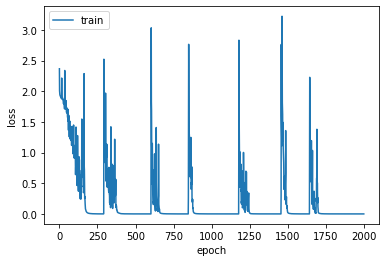

In [7]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [8]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()


50/50 [==============================] - 0s 578us/step - loss: 1.0729e-06 - accuracy: 1.0000
accuracy: 100.00%


In [9]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
